In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

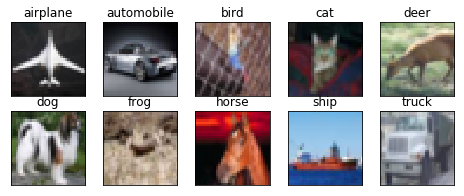

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0618 00:17:01.203470 140507786389376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0618 00:17:01.221590 140507786389376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 00:17:01.224155 140507786389376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':
W0618 00:17:01.680906 140507786389376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and wil

Epoch 1/100
390/390 [==============================] - 12s 31ms/step - loss: 1.8391 - acc: 0.2983 - val_loss: 1.4259 - val_acc: 0.4707
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3187 - acc: 0.5210 - val_loss: 1.0727 - val_acc: 0.6106
Epoch 3/100
390/390 [==============================] - 9s 22ms/step - loss: 1.1003 - acc: 0.6126 - val_loss: 0.9467 - val_acc: 0.6632
Epoch 4/100
390/390 [==============================] - 9s 22ms/step - loss: 0.9666 - acc: 0.6631 - val_loss: 0.8635 - val_acc: 0.6993
Epoch 5/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8664 - acc: 0.7010 - val_loss: 0.7597 - val_acc: 0.7441
Epoch 6/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8017 - acc: 0.7264 - val_loss: 0.7279 - val_acc: 0.7524
Epoch 7/100
390/390 [==============================] - 9s 22ms/step - loss: 0.7411 - acc: 0.7452 - val_loss: 0.6813 - val_acc: 0.7683
Epoch 8/100
390/390 [==============================] - 9s 22m

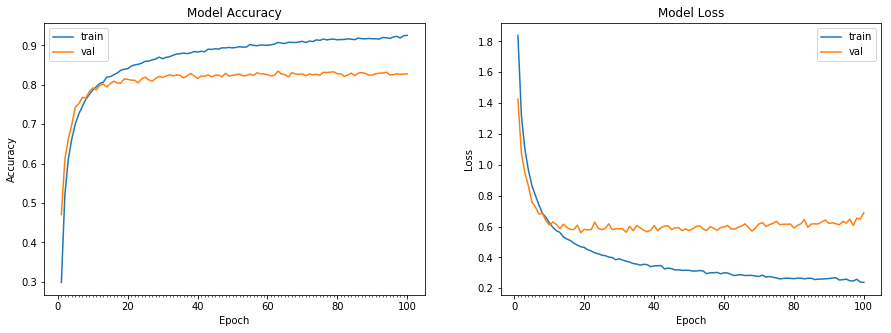

Accuracy on test data is: 82.82


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Functional Network

In [0]:
from keras.layers import Input, Conv2D, SeparableConv2D, Concatenate
from keras.models import Model
from keras.utils import plot_model

from IPython.display import Image

inputs = Input(shape=(32, 32, 3))

# 1. Normal Convolution
normal_conv = Conv2D(filters=32, kernel_size=3, activation='relu', name='normal_conv_1')(inputs) # 30
normal_conv = BatchNormalization()(normal_conv)
normal_conv = Dropout(0.3)(normal_conv)


normal_conv = Conv2D(filters=32, kernel_size=3, activation='relu', name='normal_conv_2')(normal_conv) # 28
normal_conv = BatchNormalization()(normal_conv)
normal_conv = Dropout(0.3)(normal_conv)

# 2. Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1))
spatiable_seperable_conv = Conv2D(filters=32, kernel_size=(3, 1), activation='relu', name='spatiable_seperable_conv_1')(normal_conv) #1x26
spatiable_seperable_conv = Conv2D(filters=32, kernel_size=(1, 3), activation='relu', name='spatiable_seperable_conv_2')(spatiable_seperable_conv) #26x1

# 3. Depthwise Separable Convolution
depthwise_seperable_conv = SeparableConv2D(filters=32, kernel_size=(3, 3), name='depthwise_seperable_conv')(spatiable_seperable_conv) #24

max_pool = MaxPooling2D(pool_size=(2, 2))(depthwise_seperable_conv) # 12x12

# 4. Grouped Convolution (use 3x3, 5x5 only)
normal_conv1 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', name='group_conv1_normal_conv1')(max_pool) #12x12
normal_conv2 = Conv2D(filters=64, kernel_size=(5, 5), padding='same', name='group_conv1_normal_conv2')(max_pool) #12x12
group_conv1 = Concatenate(name='normal_conv_merge')([normal_conv1, normal_conv2, max_pool])

# 6. Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 
normal_conv_dilation_1 = Conv2D(filters=64, kernel_size=3, padding='same', name='group_conv2_normal_conv1')(group_conv1) #12x12
normal_conv_dilation_2 = Conv2D(filters=64, kernel_size=3, padding='same', dilation_rate=(2,2), name='group_con21_normal_conv2')(group_conv1) #12x12
group_conv2 = Concatenate(name='normal_conv_merge2')([normal_conv_dilation_1, normal_conv_dilation_2])

max_pool = MaxPooling2D(pool_size=(2, 2))(group_conv2) # 6x6

normal_conv = Conv2D(filters=128, kernel_size=3, activation='relu', name='normal_conv_3')(max_pool) # 4x4
normal_conv = BatchNormalization()(normal_conv)
normal_conv = Dropout(0.3)(normal_conv)

normal_conv = Conv2D(filters=128, kernel_size=4, activation='relu', name='normal_conv_4')(normal_conv) #2x2
normal_conv = BatchNormalization()(normal_conv)
normal_conv = Dropout(0.3)(normal_conv)

pointwise_conv = Conv2D(10, (1, 1), activation='relu', name='pointwise_conv')(normal_conv)

flatten=Flatten()(pointwise_conv)
output=Activation('softmax')(flatten)

model = Model(inputs=inputs, outputs=output)

learning_rate = 0.003

def scheduler(epoch, lr):
  return round(learning_rate * 1/(1 + 0.35 * epoch), 10)

mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# Compile the model
model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_83 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
normal_conv_1 (Conv2D)          (None, 30, 30, 32)   896         input_83[0][0]                   
__________________________________________________________________________________________________
batch_normalization_46 (BatchNo (None, 30, 30, 32)   128         normal_conv_1[0][0]              
__________________________________________________________________________________________________
dropout_46 (Dropout)            (None, 30, 30, 32)   0           batch_normalization_46[0][0]     
__________________________________________________________________________________________________
normal_con

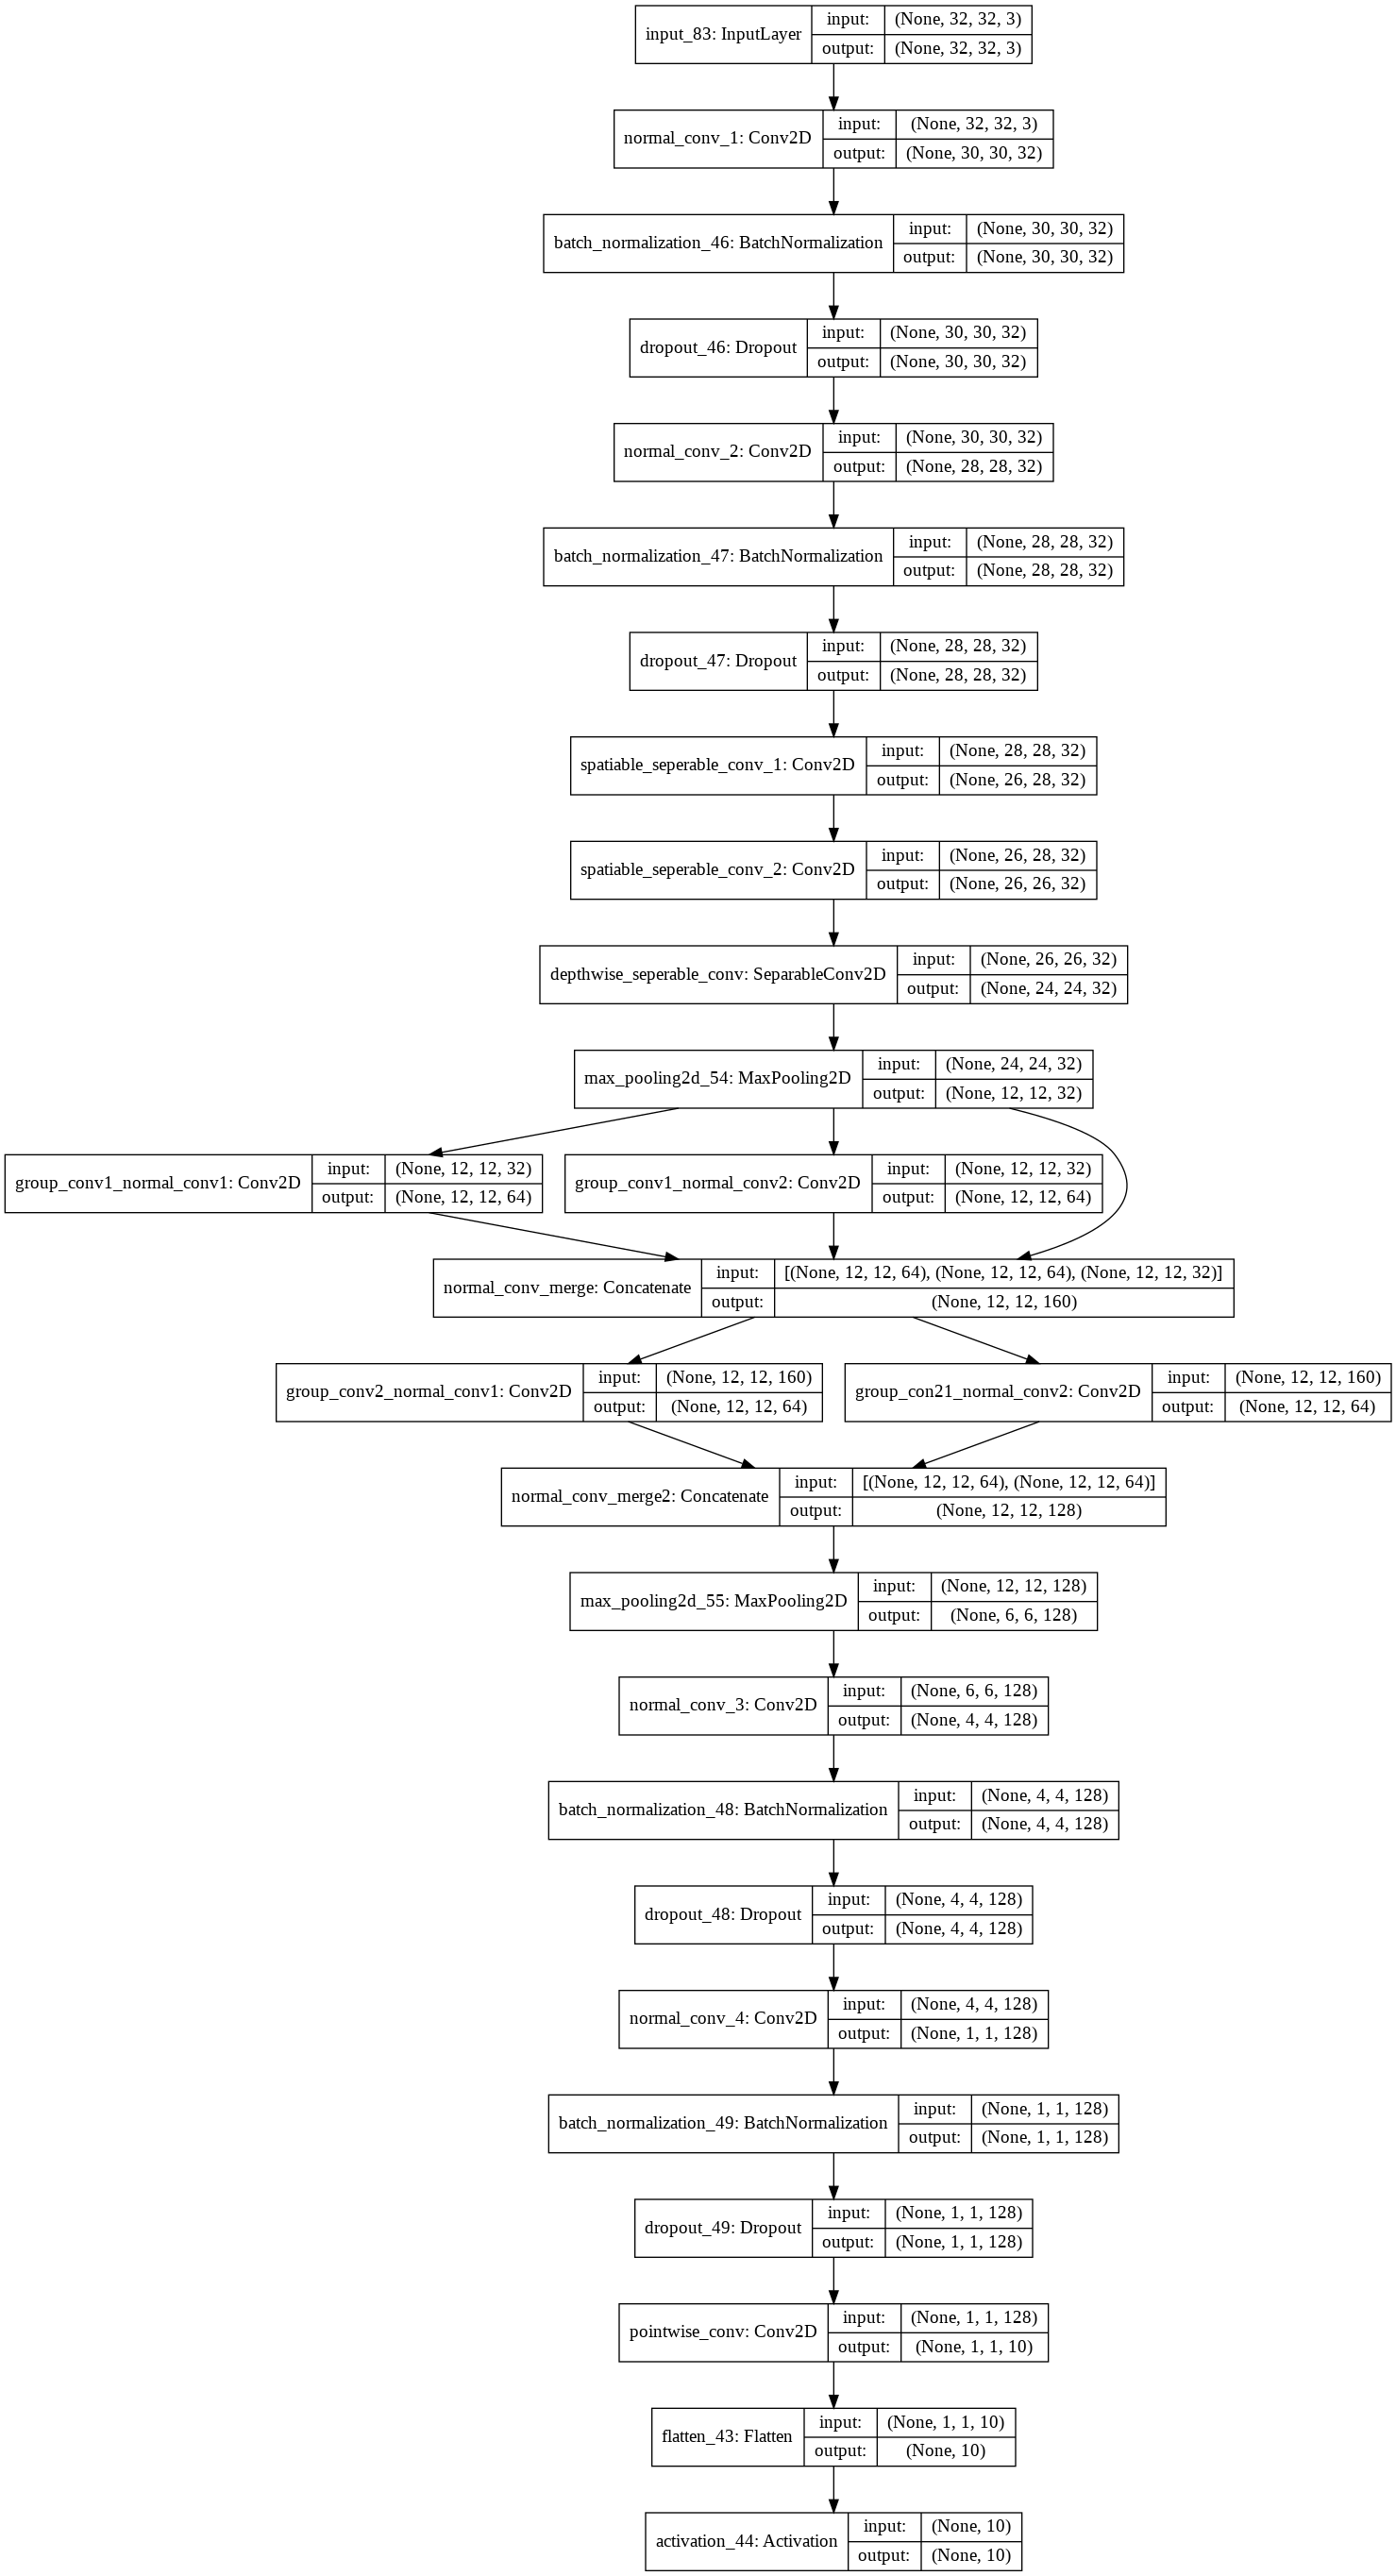

In [150]:
model.summary()

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`
  del sys.path[0]


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 30s 77ms/step - loss: 1.7696 - acc: 0.3563 - val_loss: 2.2866 - val_acc: 0.2900

Epoch 00001: val_acc improved from -inf to 0.29000, saving model to best_model.h5
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022222222.
390/390 [==============================] - 17s 45ms/step - loss: 1.3952 - acc: 0.4984 - val_loss: 2.3841 - val_acc: 0.2854

Epoch 00002: val_acc did not improve from 0.29000
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0017647059.
390/390 [==============================] - 17s 44ms/step - loss: 1.1976 - acc: 0.5708 - val_loss: 1.9546 - val_acc: 0.4000

Epoch 00003: val_acc improved from 0.29000 to 0.40000, saving model to best_model.h5
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0014634146.
390/390 [==============================] - 17s 44ms/step - loss: 1.0955 - 

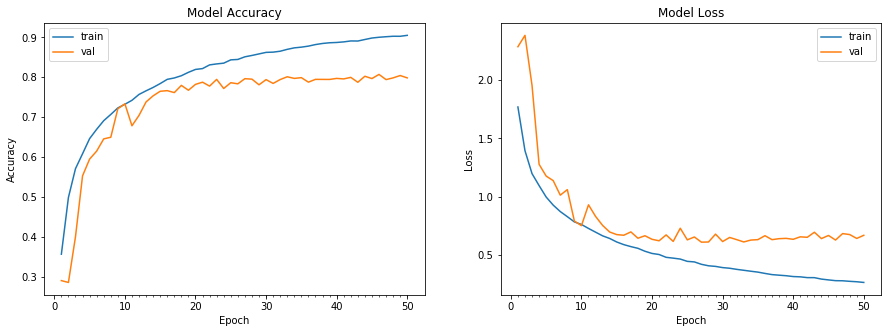

Accuracy on test data is: 79.84


In [151]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1), mc], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))